In [98]:
import bt
import pandas as pd
import numpy as np

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/tmqr_framework2/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['spy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Get the benchmark data: SPY, AGG, GSP

In [99]:
# fetch some data

start_date = '2010-01-01'


spy = bt.get('spy', start=start_date)

In [100]:
agg = bt.get('agg', start=start_date)

In [101]:
gsp = bt.get('gsp', start=start_date)

In [102]:
mom = bt.get('mom', start=start_date)

In [103]:
wtmf = bt.get('wtmf', start=start_date)

In [104]:
# create the strategy
Buy_and_Hold_SP = bt.Strategy('Buy&Hold S&P', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])


Buy_and_Hold_AGG = bt.Strategy('Buy&Hold AGG', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

Buy_and_Hold_GSP = bt.Strategy('Buy&Hold GSP', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

Buy_and_Hold_MOM = bt.Strategy('Buy&Hold MOM', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

Buy_and_Hold_WTMF = bt.Strategy('Buy&Hold WTMF', [bt.algos.RunMonthly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighEqually(),
                       bt.algos.Rebalance()])

Buy&Hold S&P
0% [############################# ] 100% | ETA: 00:00:00Buy&Hold AGG
0% [############################# ] 100% | ETA: 00:00:00Buy&Hold GSP
0% [############################# ] 100% | ETA: 00:00:00Buy&Hold MOM
0% [############################# ] 100% | ETA: 00:00:00Buy&Hold WTMF
0% [############################# ] 100% | ETA: 00:00:00

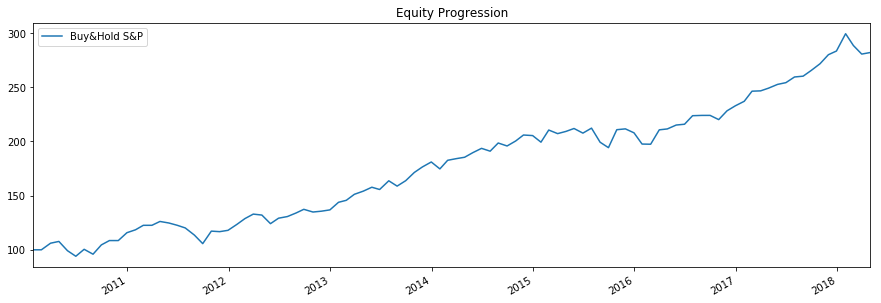

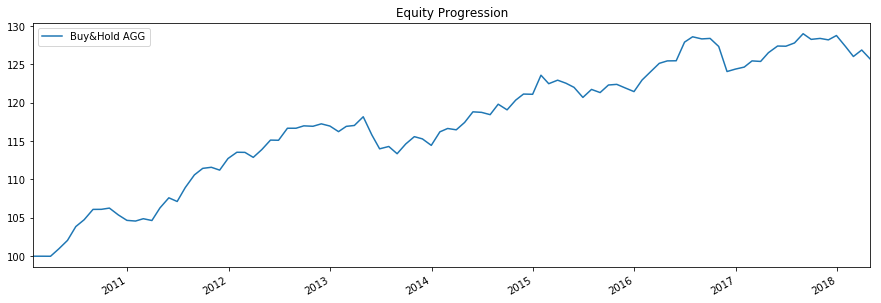

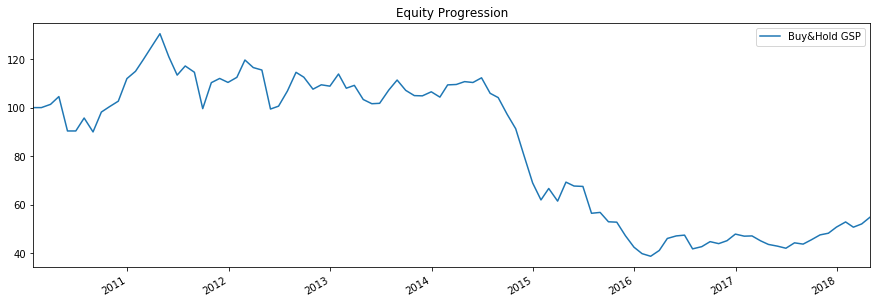

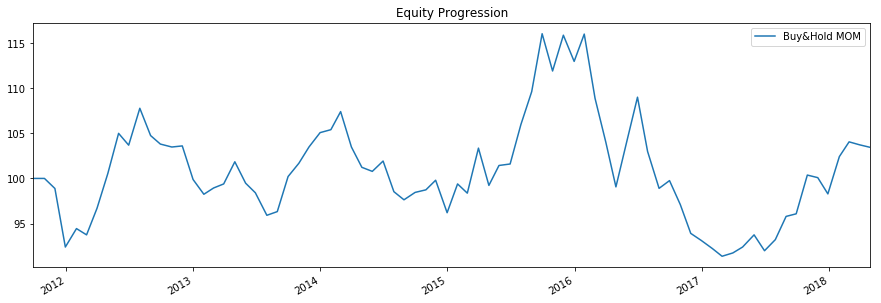

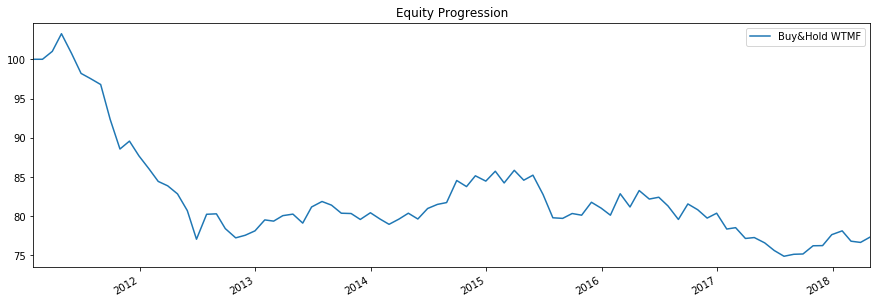

In [105]:
# create a backtest and run it

spy = spy.asfreq('BM', method='ffill').dropna()
spy_alpha_portfolio = bt.Backtest(Buy_and_Hold_SP, spy)


res_spy = bt.run(spy_alpha_portfolio)


agg = agg.asfreq('BM', method='ffill').dropna()
agg_alpha_portfolio = bt.Backtest(Buy_and_Hold_AGG, agg)
res_agg = bt.run(agg_alpha_portfolio)

gsp = gsp.asfreq('BM', method='ffill').dropna()
gsp_alpha_portfolio = bt.Backtest(Buy_and_Hold_GSP, gsp)
res_gsp = bt.run(gsp_alpha_portfolio)

mom = mom.asfreq('BM', method='ffill').dropna()
mom_alpha_portfolio = bt.Backtest(Buy_and_Hold_MOM, mom)
res_mom = bt.run(mom_alpha_portfolio)

wtmf = wtmf.asfreq('BM', method='ffill').dropna()
wtmf_alpha_portfolio = bt.Backtest(Buy_and_Hold_WTMF, wtmf)
res_wtmf = bt.run(wtmf_alpha_portfolio)



res_spy.plot()
res_agg.plot()
res_gsp.plot()
res_mom.plot()
res_wtmf.plot()


## Create a Universal Momentum rule to apply to a list of products.  The rule will define a bullish and bearish regime for each underlying product. 

            ***During bullish periods the Universal Momentum rule will seek 1.5 times the return of the underlying product.
            ***During bearish periods the Universal Momentum rule will seek -0.75 times the returns of the underlying product.
            
            ****Bullish periods occur when the product is above the 10 month median price.
            ****Bearish peridos occur when the product is below the 10 month median price.

In [106]:
# first let's create a helper function to create a universal momentum backtest
def universal_momentum(ticker, start=start_date,
              long_ma=10, name='universal_momentum'):
    # these are all the same steps as above
    data = bt.get(ticker, start=start)
    data = data.asfreq('BM', method='ffill').dropna()
    

    long_sma  = data.rolling(window=long_ma,center=False).median()

    # target weights
    tw = long_sma.copy()
    tw[data > long_sma] = 1.75
    tw[data <= long_sma] = -0.75
    tw[long_sma.isnull()] = 0.0

    # here we specify the children (3rd) arguemnt to make sure the strategy
    # has the proper universe. This is necessary in strategies of strategies
    universal_momentum_strategy = bt.Strategy(name, [bt.algos.WeighTarget(tw), 
                                                     bt.algos.Rebalance()], [ticker])

    return bt.Backtest(universal_momentum_strategy, data)

In [107]:
# ok now let's create a few backtests and gather the results.
# these will later become our "synthetic securities"
t1 = universal_momentum('corn', name='corn_u_mo')
t2 = universal_momentum('tlt', name='tlt_u_mo')
t3 = universal_momentum('uso', name='uso_u_mo')

In [108]:
t4 = universal_momentum('ung', name='ung_u_mo')
t5 = universal_momentum('cane', name='cane_u_mo')

In [112]:
t6 = universal_momentum('jo', name='jo_u_mo')

In [113]:
t7 = universal_momentum('slv', name='slv_u_mo')
t8 = universal_momentum('gld', name='gld_u_mo')

In [114]:
t9 = universal_momentum('soyb', name='soyb_u_mo')

In [115]:
t10 = universal_momentum('uco', name='uco_u_mo')
t11 = universal_momentum('pplt', name='pplt_u_mo')

In [116]:
t12 = universal_momentum('dbb', name='dbb_u_mo')


In [117]:
from tiingo import TiingoClient

config = {}

# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "539f5b3fef6e2386a8e71ad5ba2a2b4fbc55d90a"

# Initialize

client = TiingoClient(config)

##### Get the description information on any component ticker

In [120]:
# Get Ticker
ticker_metadata = client.get_ticker_metadata("uco")
ticker_metadata

print ('Name :  ' + ticker_metadata['name'] )
# print('Description : \n ' + ticker_metadata['description'] )
print('Exchange :  ' + ticker_metadata['exchangeCode'])

Name :  ProShares Ultra DJ-UBS Crude Oil ETF
Exchange :  NYSE ARCA


In [121]:
# let's run these strategies now
res = bt.run(t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12)

corn_u_mo
0% [############################# ] 100% | ETA: 00:00:00tlt_u_mo
0% [############################# ] 100% | ETA: 00:00:00uso_u_mo
0% [############################# ] 100% | ETA: 00:00:00ung_u_mo
0% [############################# ] 100% | ETA: 00:00:00cane_u_mo
0% [############################# ] 100% | ETA: 00:00:00jo_u_mo
0% [############################# ] 100% | ETA: 00:00:00slv_u_mo
0% [############################# ] 100% | ETA: 00:00:00gld_u_mo
0% [############################# ] 100% | ETA: 00:00:00soyb_u_mo
0% [############################# ] 100% | ETA: 00:00:00uco_u_mo
0% [############################# ] 100% | ETA: 00:00:00pplt_u_mo
0% [############################# ] 100% | ETA: 00:00:00dbb_u_mo
0% [############################# ] 100% | ETA: 00:00:00

In [152]:
res.prices.columns

Index(['corn_u_mo', 'tlt_u_mo', 'uso_u_mo', 'ung_u_mo', 'cane_u_mo', 'jo_u_mo',
       'slv_u_mo', 'gld_u_mo', 'soyb_u_mo', 'uco_u_mo', 'pplt_u_mo',
       'dbb_u_mo'],
      dtype='object')

In [143]:
# now that we have run the strategies, let's extract
# the data to create "synthetic securities"
data = bt.merge(res['corn_u_mo'].prices,
                res['tlt_u_mo'].prices,
                res['uso_u_mo'].prices,
                res['ung_u_mo'].prices,
                res['cane_u_mo'].prices,
                res['jo_u_mo'].prices,
                res['slv_u_mo'].prices,
                res['gld_u_mo'].prices,
                res['soyb_u_mo'].prices,
                res['uco_u_mo'].prices,
                res['pplt_u_mo'].prices,
                res['dbb_u_mo'].prices,
               )


res = bt.run(t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12)
# now we have our new data. This data is basically the equity
# curves of both backtested strategies. Now we can just use this
# to test any old strategy, just like before.
long_sma  = data.rolling(window=5,center=False).median()
    # target weights
tw_P = long_sma.copy()
tw_P[data > long_sma] = 1.0  #this weighting does not seem to be working any advice?
tw_P[data <= long_sma] = 0.0
tw_P[long_sma.isnull()] = 0.0


universal_momentum_index_strategy_InvVol = bt.Strategy('universal_momentum_index_InvVol', [bt.algos.SelectAll(),
#                                                                     bt.algos.WeighTarget(tw_P),
#                                                                     bt.algos.WeighEqually(), 
#                                                                     bt.algos.SelectMomentum(n = 2, lookback=pd.DateOffset(months=2)),
                                                                    bt.algos.WeighInvVol(),
#                                                                     bt.algos.WeighRandomly(),
                                                                    bt.algos.LimitWeights(limit=0.4), 
#                                                                     bt.algos.WeighERC(),
                                                                    bt.algos.Rebalance()])


universal_momentum_index_strategy_Equal = bt.Strategy('universal_momentum_index_Equal', [bt.algos.SelectAll(),
                                                                    bt.algos.WeighTarget(tw_P),
                                                                    bt.algos.WeighEqually(), 
#                                                                     bt.algos.SelectMomentum(n = 2, lookback=pd.DateOffset(months=2)),
#                                                                     bt.algos.WeighInvVol(),
#                                                                     bt.algos.WeighRandomly(),
                                                                    bt.algos.LimitWeights(limit=0.5), 
#                                                                     bt.algos.WeighERC(),
                                                                    bt.algos.Rebalance()])

In [144]:


# create and run
u_mo_inv_vol = bt.Backtest(universal_momentum_index_strategy_InvVol, data ,initial_capital=50000000.0, commissions=lambda q, p: max(100, abs(q) * 0.0021),integer_positions=True, progress_bar=True)
res_inv_vol = bt.run(u_mo_inv_vol)


u_mo_equ = bt.Backtest(universal_momentum_index_strategy_Equal, data ,initial_capital=200000.0, commissions=lambda q, p: max(100, abs(q) * 0.0021),integer_positions=True, progress_bar=True)
res_mo_equ = bt.run(u_mo_equ)



universal_momentum_index_InvVol
0% [############################# ] 100% | ETA: 00:00:00universal_momentum_index_Equal
0% [############################# ] 100% | ETA: 00:00:00

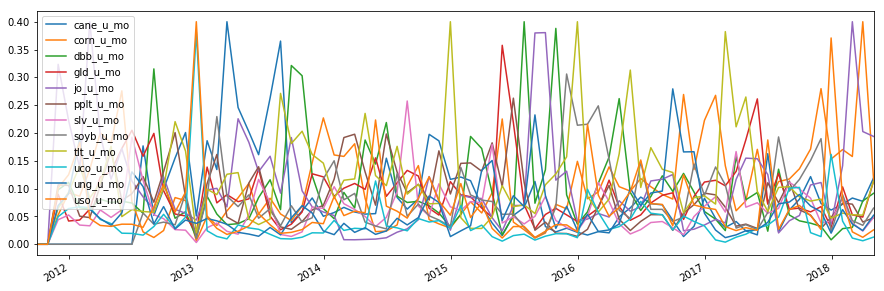

In [145]:
res_inv_vol.plot_security_weights()

In [146]:
res_inv_vol.display_monthly_returns()

    

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2011   0      0      0      0      0      0      0      0      0      0     -0      1.72    1.72
  2012  -1.02   1.52   1.47  -0.45   2.5   -5.03   1.39  -3.56  -1.4   -1.78  -1.24  -4.19  -11.47
  2013  11.8   -2.32  -0.26   1.36   0.35   2.61   1.09  -0.74  -1.84   0.79   1.32   1.2    15.71
  2014  -1.62   2.12  -1.74   2.58  -0.88   1.05  -3.16   0.49   2.36   1.06   3.01   5.88   11.37
  2015   6.44  -0.22   3.39  -3.82   1.8   -3.71   3.32   1.12   2.18   0.48   4.7    0.96   17.38
  2016  -1.88   3.58  -1.84   4.52  -4.37   3.51  -3.15  -2.77   1.41   0.46   2.69   4.16    5.91
  2017   2.4    0.07  -3.63  -0.06   1.29   0.34  -4.12   3.63  -5.04   3.32   0.68   0.92   -0.65
  2018   9.58  -1.71   0.67   1.48   0      0      0      0      0      0      0      0      10.03


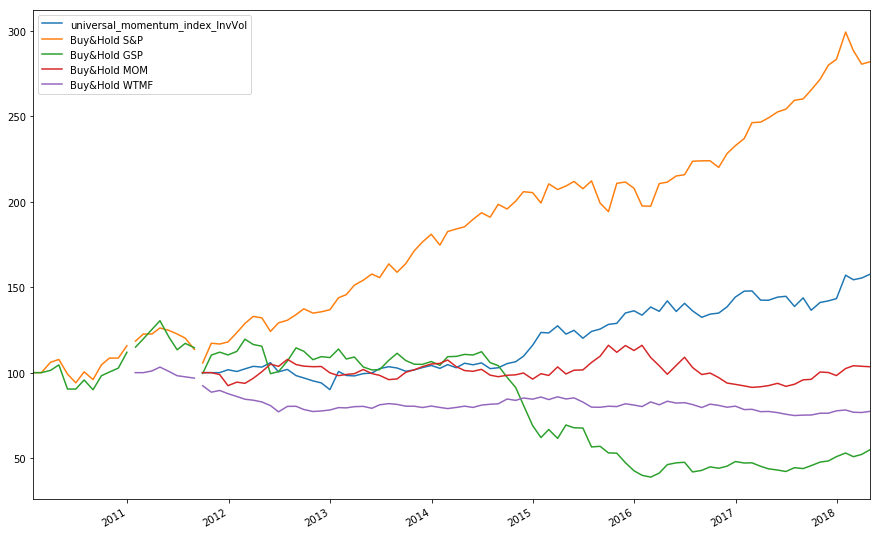

In [147]:
returns  = data.to_log_returns().dropna()

# print(returns.head())
# ax = returns.hist(figsize=(15, 10))

# print(returns.corr().as_format('.2f'))

comp = bt.merge (res_inv_vol.prices, res_spy.prices, res_gsp.prices, res_mom.prices, res_wtmf.prices )


comp.plot(figsize=(15, 10))

In [149]:

stats = comp.calc_stats()
stats.display()

    

Stat                 universal_momentum_index_InvVol    Buy&Hold S&P    Buy&Hold GSP    Buy&Hold MOM    Buy&Hold WTMF
-------------------  ---------------------------------  --------------  --------------  --------------  ---------------
Start                2011-09-30                         2011-09-30      2011-09-30      2011-09-30      2011-09-30
End                  2018-04-30                         2018-04-30      2018-04-30      2018-04-30      2018-04-30
Risk-free rate       0.00%                              0.00%           0.00%           0.00%           0.00%

Total Return         57.72%                             166.89%         -44.76%         3.44%           -16.23%
Daily Sharpe         3.26                               6.84            -1.56           0.46            -1.97
Daily Sortino        6.48                               11.91           -2.10           0.77            -3.33
CAGR                 7.17%                              16.08%          -8.62%          0

<module 'matplotlib.pyplot' from '/home/tmqr_framework2/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

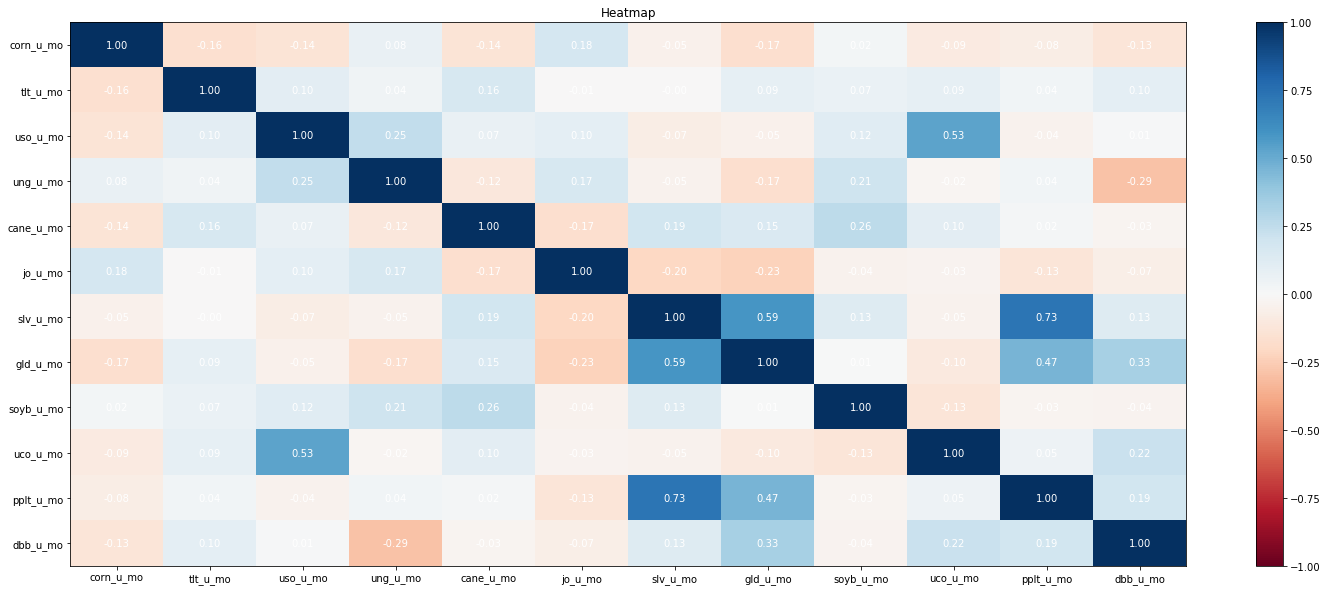

In [83]:
returns.plot_corr_heatmap(figsize=(25, 10))

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2012   0      0      0      0      0      0      0      0      0     -0.2   -1.57  -4.1   -5.79
  2013  10.91  -2.82  -0.78   0.68  -0.23   2.12   0.47  -1.31  -2.42   0.21   0.72   0.66   7.84
  2014  -2.2    1.46  -2.27   2.03  -1.44   0.47  -3.72  -0.12   1.74   0.43   2.38   5.24   3.7
  2015   6.7   -0.74   2.87  -4.31   1.24  -4.25   2.73   0.63   1.62  -0.05   4.12   0.43  10.95
  2016  -2.8    3.04  -2.33   3.97  -4.84   2.96  -3.69  -3.13   0.89  -0.07   2.18   3.61  -0.76
  2017   1.82  -0.44  -4.06  -0.59   0.76  -0.17  -4.63   3.08  -5.56   2.73   0.1    0.34  -6.84
  2018   9.03  -2.19   0.47   0.98   0      0      0      0      0      0      0      0      8.19


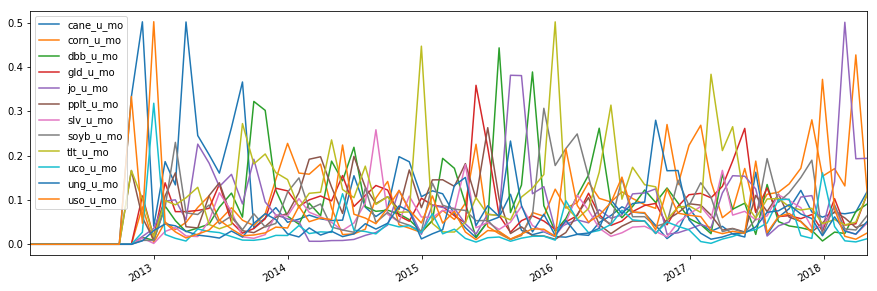

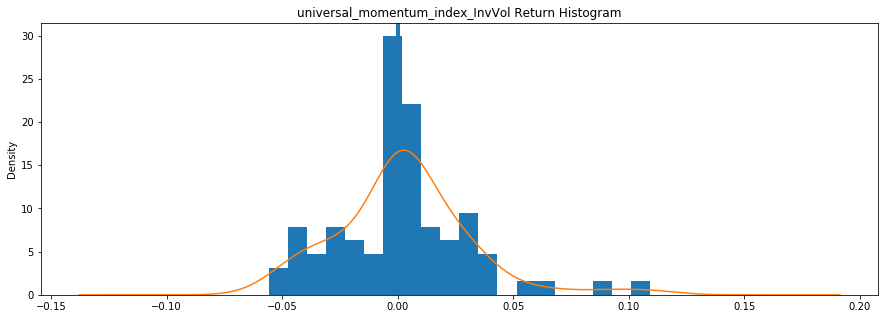

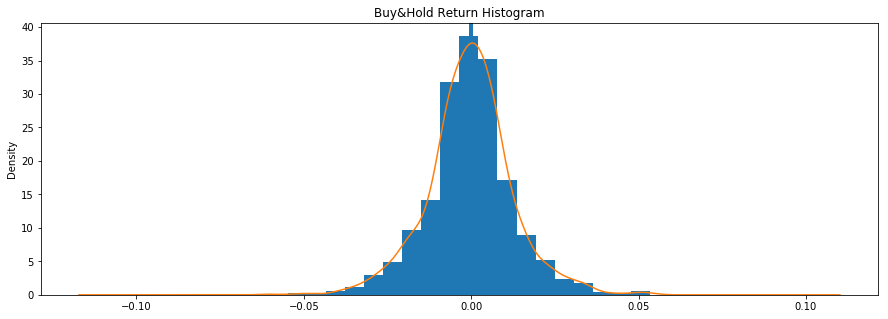

In [84]:
res_inv_vol.display_monthly_returns()
# res_gsp.display_monthly_returns()

res_inv_vol.plot_security_weights()

res_inv_vol.plot_histogram()

res_gsp.plot_histogram()



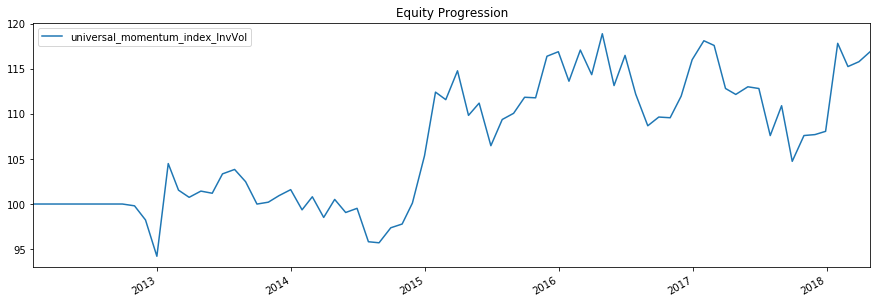

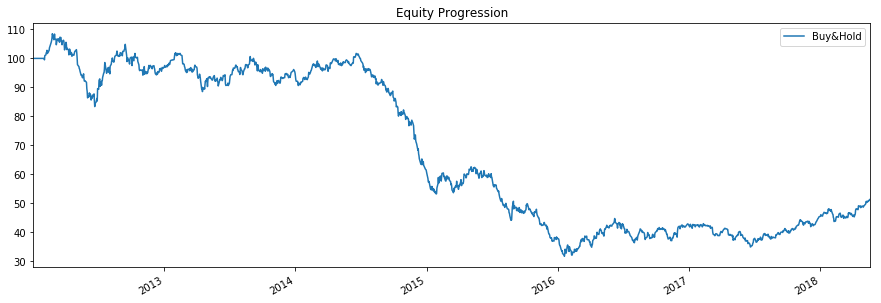

In [85]:
res_inv_vol.plot()

res_gsp.plot()



In [86]:
# res.prices.plot()
# res_gsp.prices.plot()

print(res_inv_vol.display_lookback_returns())

print(res_mo_equ.display_lookback_returns())


print(res_gsp.display_lookback_returns())


      universal_momentum_index_InvVol
mtd                             0.98%
3m                              8.19%
6m                             11.63%
ytd                             8.19%
1y                              4.24%
3y                              2.10%
5y                              2.88%
10y                             2.53%
incep                           2.53%
      universal_momentum_index_Equal
mtd                            2.40%
3m                             2.89%
6m                             9.99%
ytd                            2.89%
1y                             2.16%
3y                             3.04%
5y                             1.70%
10y                           -1.03%
incep                         -1.03%
      Buy&Hold
mtd      4.94%
3m      13.95%
6m      19.10%
ytd     13.58%
1y      28.74%
3y      -5.86%
5y     -11.23%
10y     -9.90%
incep   -9.90%


In [87]:
table1 = (res_inv_vol.display())



Stat                 universal_momentum_index_InvVol
-------------------  ---------------------------------
Start                2012-01-29
End                  2018-04-30
Risk-free rate       0.00%

Total Return         16.91%
Daily Sharpe         1.34
Daily Sortino        2.29
CAGR                 2.53%
Max Drawdown         -11.90%
Calmar Ratio         0.21

MTD                  0.98%
3m                   8.19%
6m                   11.63%
YTD                  8.19%
1Y                   4.24%
3Y (ann.)            2.10%
5Y (ann.)            2.88%
10Y (ann.)           2.53%
Since Incep. (ann.)  2.53%

Daily Sharpe         1.34
Daily Sortino        2.29
Daily Mean (ann.)    61.40%
Daily Vol (ann.)     45.86%
Daily Skew           0.83
Daily Kurt           2.42
Best Day             10.91%
Worst Day            -5.56%

Monthly Sharpe       0.30
Monthly Sortino      0.51
Monthly Mean (ann.)  3.00%
Monthly Vol (ann.)   10.14%
Monthly Skew         0.81
Monthly Kurt         2.27
Best Month      

In [88]:
table2 = (res_gsp.display())

Stat                 Buy&Hold
-------------------  ----------
Start                2012-01-02
End                  2018-05-21
Risk-free rate       0.00%

Total Return         -48.60%
Daily Sharpe         -0.41
Daily Sortino        -0.61
CAGR                 -9.90%
Max Drawdown         -70.86%
Calmar Ratio         -0.14

MTD                  4.94%
3m                   13.95%
6m                   19.10%
YTD                  13.58%
1Y                   28.74%
3Y (ann.)            -5.86%
5Y (ann.)            -11.23%
10Y (ann.)           -9.90%
Since Incep. (ann.)  -9.90%

Daily Sharpe         -0.41
Daily Sortino        -0.61
Daily Mean (ann.)    -8.38%
Daily Vol (ann.)     20.30%
Daily Skew           0.04
Daily Kurt           1.76
Best Day             5.33%
Worst Day            -6.03%

Monthly Sharpe       -0.41
Monthly Sortino      -0.55
Monthly Mean (ann.)  -8.39%
Monthly Vol (ann.)   20.22%
Monthly Skew         -0.46
Monthly Kurt         0.36
Best Month           12.71%
Worst Month     